In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data ingestion

In [2]:
df=pd.read_csv('autos.csv', encoding = "ISO-8859-1" )

## Data Exploration

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [5]:
df.isnull().sum() # null values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

## Statistical summary

In [6]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# Data Exploration 

## Continuous Variable

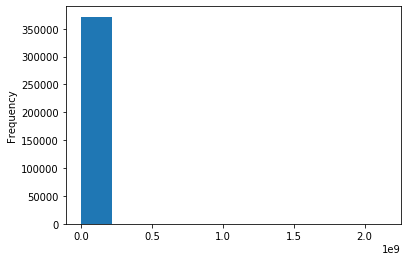

In [7]:
df['price'].plot(kind='hist')

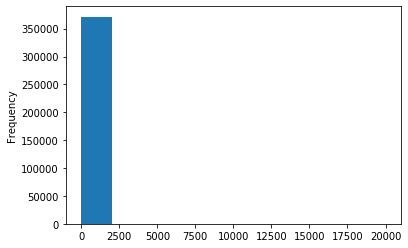

In [8]:
df['powerPS'].plot(kind='hist')

In [9]:
def delete_outlier(col, df):
    q1 = df[c].quantile(.25)
    q3 = df[c].quantile(.75)
    mask = df[c].between(q1, q3, inclusive=True)
    df = df.loc[mask]
    return (df)

# as there are lots undistributed data so drop outliers i.e. < +- 1.5IQR
l = ['powerPS', 'price']
for c in l:
    df=delete_outlier(c, df)
    print (df.shape)

(199804, 20)
(100826, 20)


## Categorical Variables

In [10]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
df["seller"].value_counts() # only 3 rows with different seller so this feature is irrelevant

privat    100826
Name: seller, dtype: int64

In [12]:
df["offerType"].value_counts() # only 12 rows are different so not useful

Angebot    100825
Gesuch          1
Name: offerType, dtype: int64

In [13]:
df["nrOfPictures"].value_counts() # all rows are 0 so not a significant

0    100826
Name: nrOfPictures, dtype: int64

count    92228.000000
mean      2002.511135
std          3.898444
min       1991.000000
25%       2000.000000
50%       2003.000000
75%       2005.000000
max       2011.000000
Name: yearOfRegistration, dtype: float64


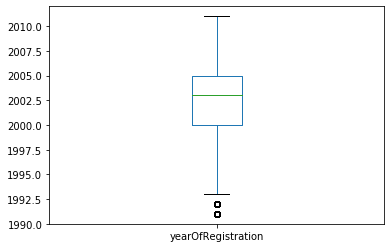

In [15]:
print (df['yearOfRegistration'].describe())
df['yearOfRegistration'].plot(kind='box')

# since most data is between 1950 and 2017
df = df[(df.yearOfRegistration < 2012)  & (df.yearOfRegistration > 1990)]

## Null handling

In [16]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType             1024
yearOfRegistration         0
gearbox                 1289
powerPS                    0
model                   2651
kilometer                  0
monthOfRegistration        0
fuelType                3484
brand                      0
notRepairedDamage      11965
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [17]:
df['vehicleType'].ffill(inplace=True)
df['gearbox'].ffill(inplace=True)
df["notRepairedDamage"].fillna("nein",inplace = True)
df["model"].ffill(inplace = True)
df["fuelType"].ffill(inplace = True)

In [18]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [19]:
## all nulls are removed

In [20]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
13,2016-03-21 21:37:40,VW_PASSAT_1.9_TDI_131_PS_LEDER,privat,Angebot,2500,control,kombi,2004,manuell,131,passat,150000,2,diesel,volkswagen,nein,2016-03-21 00:00:00,0,90762,2016-03-23 02:50:54


In [21]:
cols_to_drop=['seller','offerType','nrOfPictures', 'name','dateCrawled','lastSeen','dateCreated', 'postalCode']

In [22]:
# drop dates and 0 columns, kilometer has similar values
# cols_to_drop=['dateCrawled', 'name', 'nrOfPictures','lastSeen','dateCreated','kilometer', 'postalCode', \
#               'yearOfRegistration','monthOfRegistration', 'abtest', 'seller','offerType','model']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein
11,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja
13,2500,control,kombi,2004,manuell,131,passat,150000,2,diesel,volkswagen,nein


In [23]:
category_feat = [c for c in df.columns if df[c].dtype =='object']
category_feat

['abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

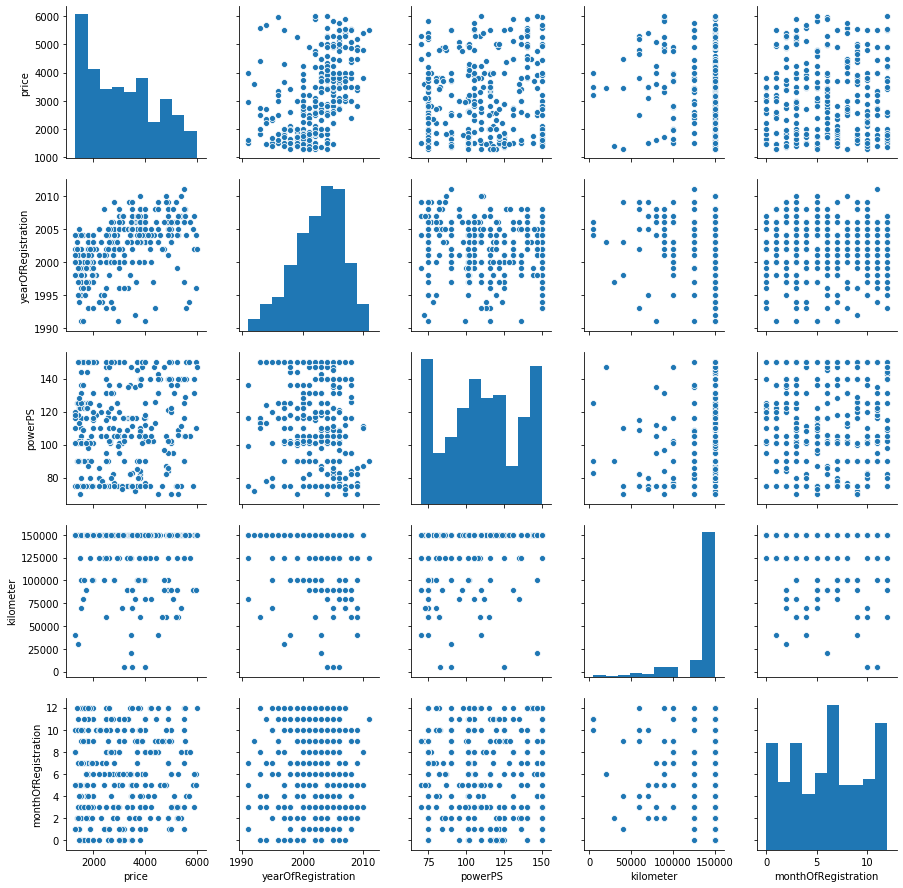

In [24]:
g = sns.pairplot(df.sample(300))
plt.show()

In [25]:
# df = df[(df['model']=='golf') | (df['model']=='3er') |( df['model'] =='andere')]
# print (df.shape)

# df = df[(df['fuelType']=='benzin') | (df['fuelType']=='diesel')]
# print (df.shape)

# #df = df[(df['brand']=='volkswagen')|( df['brand'] =='opel') | ( df['brand'] =='mercedes_benz')]
# df = df[(df['vehicleType']=='limousine') | (df['vehicleType']=='kleinwagen') |( df['vehicleType'] =='kombi')]
# print (df.shape)

In [26]:
df.shape

(92228, 12)

## Data Preparation

In [27]:
df1= pd.get_dummies(df, columns=['abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage'], drop_first=True)

In [28]:
df1.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_test,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_nein
3,1500,2001,75,150000,6,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,2200,2004,109,150000,8,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,2000,2004,105,150000,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2799,2005,140,150000,12,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,2500,2004,131,150000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [29]:
df1.shape

(92228, 273)

In [30]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

In [31]:
data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,1,4,2001,1,75,101,150000,6,1,36,1
6,2200,1,2,2004,1,109,8,150000,8,1,25,1
10,2000,0,6,2004,1,105,9,150000,12,1,19,1
11,2799,0,5,2005,1,140,150,150000,12,3,36,0
13,2500,0,5,2004,1,131,150,150000,2,3,36,1


In [1228]:
# df_data = df[feat_cols]
# df_data.head()

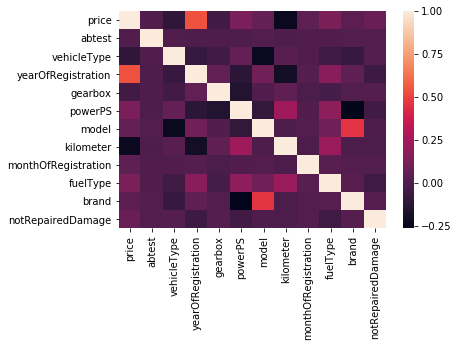

In [32]:
sns.heatmap(data.corr())

## Model building

In [33]:
X= data.drop('price' , axis=1)
Y= data['price']

In [34]:
X.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1,4,2001,1,75,101,150000,6,1,36,1
6,1,2,2004,1,109,8,150000,8,1,25,1
10,0,6,2004,1,105,9,150000,12,1,19,1
11,0,5,2005,1,140,150,150000,12,3,36,0
13,0,5,2004,1,131,150,150000,2,3,36,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [1330]:
# scaler = StandardScaler()

# X_train_scaled = pd.DataFrame( scaler.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled =  pd.DataFrame(scaler.fit_transform(X_test),columns=X_train.columns)

# feature_names = X_train.columns

In [36]:
# X_train_scaled.head()

## Linear regression

In [37]:
# Create a data frame for storing results from each model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error'])

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Linear Regression'] = [r2, mae, rmse]
summary_df

,Linear Regression
R-squared,0.384953
Mean Absolute Error,850.143630
Root Mean Squared Error,1060.489921


## Random Forest Regression

In [41]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Random Forest'] = [r2, mae, rmse]
summary_df

/Users/sulbha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Linear Regression,Random Forest
R-squared,0.384953,0.632549
Mean Absolute Error,850.143630,606.627195
Root Mean Squared Error,1060.489921,819.695011


## Decision Tree Regressor

In [42]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Decision Tree Regressor'] = [r2, mae, rmse]
summary_df

,Linear Regression,Random Forest,Decision Tree Regressor
R-squared,0.384953,0.632549,0.441465
Mean Absolute Error,850.143630,606.627195,710.300577
Root Mean Squared Error,1060.489921,819.695011,1010.596496


## Gradient boosting Regressor with Hyper parameter tuning, Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor 
from time import time

# We will try all combinations of these possible parameter values
tuned_params = {'n_estimators': [10, 20], 
                'max_depth': [2,4], 
                'min_samples_split': [2, 3],
                'learning_rate': [0.001, 0.01],
                'loss' :['ls']}
gscv = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                    tuned_params, cv=5, scoring='neg_mean_squared_error')

# 
start = time()
gscv.fit(X_train, y_train)
y_pred= gbr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Gradient Boosting Regressor'] = [r2, mae, rmse]
print (summary_df)

print('The grid cross validation lasted {:0.1f} seconds'.format(time() - start))
print('Best parameters set found on development set:\n\t{}'.format(
        ', '.join(['{}: {}'.format(i,j) for i,j in gscv.best_params_.items()])))

In [1343]:
# recursive feature elimination with cross validation, using r-squared score as metric
lm = LinearRegression()  # using a linear model as before
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(X_train, y_train)

# print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# save the selected features
print('Features selected: {}'.format(', '.join(np.array(feature_names)[rfecv.support_].tolist())))

# get the feature elimination order
ranked_features, _ = zip(*sorted(zip(feature_names, rfecv.ranking_.tolist()),
                                 key=lambda x: x[1],
                                 reverse=True))
print('Suggested order of feature removal: {}'.format(', '.join(ranked_features)))

# plot number of features vs. scores
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

KeyboardInterrupt: 

In [1238]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [1090]:
feature_names

Index(['powerPS', 'notRepairedDamage', 'abtest_test', 'vehicleType_kombi',
       'vehicleType_limousine', 'gearbox_manuell', 'model_golf',
       'fuelType_diesel', 'brand_opel', 'brand_volkswagen'],
      dtype='object')

In [1091]:
feature_names[rfecv.support_]

Index(['powerPS', 'notRepairedDamage', 'vehicleType_kombi',
       'vehicleType_limousine', 'model_golf', 'fuelType_diesel', 'brand_opel',
       'brand_volkswagen'],
      dtype='object')

In [1092]:
cols = list(feature_names[rfecv.support_])

In [1093]:
cols

['powerPS',
 'notRepairedDamage',
 'vehicleType_kombi',
 'vehicleType_limousine',
 'model_golf',
 'fuelType_diesel',
 'brand_opel',
 'brand_volkswagen']

In [1094]:
X_train_scaled.head()

,powerPS,notRepairedDamage,abtest_test,vehicleType_kombi,vehicleType_limousine,gearbox_manuell,model_golf,fuelType_diesel,brand_opel,brand_volkswagen
0,0.803456,0.468935,0.963682,-0.443927,0.625149,0.36505,0.300706,-0.715776,-0.073942,0.292294
1,0.275672,0.468935,0.963682,-0.443927,0.625149,0.36505,0.300706,1.397085,-0.073942,0.292294
2,-1.163740,0.468935,-1.037686,-0.443927,-1.599619,0.36505,0.300706,-0.715776,-0.073942,0.292294
3,-0.683936,0.468935,0.963682,2.252625,-1.599619,0.36505,0.300706,-0.715776,-0.073942,0.292294
4,0.275672,0.468935,0.963682,-0.443927,0.625149,0.36505,0.300706,1.397085,-0.073942,0.292294


In [1095]:
X_train_subset = X_train_scaled[cols]
lm2 = LinearRegression()
lm2.fit(X_train_subset, y_train)

X_test_part = X_test_scaled[cols]
predicted = lm2.predict(X_test_part)

r_squared = r2_score(y_test, predicted)
mae = np.mean(abs(predicted - y_test))
rmse = np.sqrt(np.mean((predicted - y_test)**2))
rae = np.mean(abs(predicted - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((predicted - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

# Create a data frame for storing results from each model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                   'Relative Absolute Error', 'Relative Squared Error'])
summary_df['Linear Regression, selected variables'] = [r_squared, mae, rmse, rae, rse]
summary_df

,"Linear Regression, selected variables"
R-squared,0.108647
Mean Absolute Error,1046.350700
Root Mean Squared Error,1271.117373
Relative Absolute Error,0.913206
Relative Squared Error,0.891353


In [1426]:


#print (sorted(gscv.cv_results_))


The grid cross validation lasted 87.0 seconds
Best parameters set found on development set:
	learning_rate: 0.01, loss: ls, max_depth: 4, min_samples_split: 2, n_estimators: 20
Grid scores on development set:


In [1429]:
print('Grid scores on development set:')

# for params, mean_test_score, std_test_score in gscv.cv_results_:
#     print('\t{:0.2f} (+/- {:0.2f}) for {}'.format(mean_score,
#                                       scores.std() * 2,
#                                       ', '.join(['{}: {}'.format(i, j) for i, j in params.items()])))


ValueError: too many values to unpack (expected 3)

In [1432]:
# gbr = GradientBoostingRegressor(n_estimators= 20, 
#                 max_depth= 4, 
#                 min_samples_split=2,
#                 learning_rate=0.01,
#                 loss ='ls')



r2 score:  0.14295612879372444
mae:  1065.410723731102
rmse:  1251.8550138402752


In [1414]:
print (r2_score(y_test, y_pred))

0.142956128793725


In [1419]:
# cross validation

from sklearn.model_selection import KFold

def run_kfold(lr, X_all, y_all):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        r2 = r2_score(y_test, predictions)
        outcomes.append(r2)
        print("Fold {0} r2_score: {1}".format(fold, r2))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(lr, X_train, y_train)

Fold 1 r2_score: 0.38007325977045225
Fold 2 r2_score: 0.40080780337905386
Fold 3 r2_score: 0.40200018499304524
Fold 4 r2_score: 0.3689961340927911
Fold 5 r2_score: 0.38718500729573124
Fold 6 r2_score: 0.39656679034083686
Fold 7 r2_score: 0.38658683445410635
Fold 8 r2_score: 0.39157584168686055
Fold 9 r2_score: 0.3802690898683023
Fold 10 r2_score: 0.3826010567631599
Mean Accuracy: 0.38766620026443394


### Next Steps - 
1. Data exploration
2. One-hot encoding on categorical variables
3. Explore other resgression algos - Lasso, Ridge, 
3. Explore ensemble methods.
4. cross-validation
5. Feature engg, scaling, Standarization, selection 

In [1440]:
r2_score(1,3)

TypeError: 'numpy.float64' object is not callable